# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


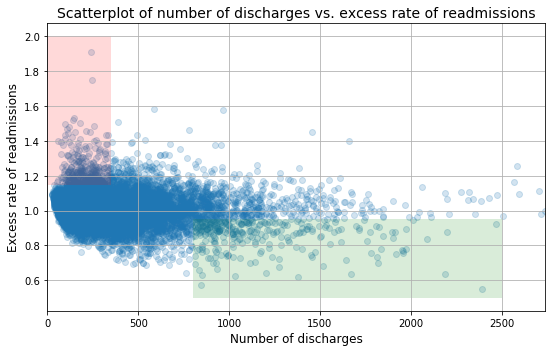

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Basic Dataset Info

In [5]:
print(hospital_read_df.info())

hospital_read_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB
None


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


Dataset seems fairly complete. There missing values in Predicted Readmission Rate, Excess Readmission Ratio and
Expected Readmission Rate. The number of missing values in these data points is the same. Each of these datapoints has 13,731 entries.

In [6]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


+ It is not possible for a working facility to have 0 discharges. 
+ The overall mean excess readmission ratio is 1.002.
+ The overall mean predicted readmission rate is 16.91.
+ The overall mean expected readmission rate is 16.86.
+ The mean values of predicted and expected readmissions are fairly close. How do they predict? Linear relationship?

### Extract Needed Arrays

Create new df with the needed columns for analysis.

In [7]:
#Convert needed columns to numbers

cols = ['Number of Discharges','Excess Readmission Ratio',
        'Predicted Readmission Rate','Expected Readmission Rate']

hospital_read_df[cols] = hospital_read_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

#Extract needed colums

df_filtered = hospital_read_df[['Number of Discharges', 'State',
                                'Excess Readmission Ratio',
                                'Predicted Readmission Rate',
                                'Expected Readmission Rate']]

#Since it is not possible for a working facility to have zero discharges remove zeroes in the discharge column

print(df_filtered.describe())

df_filtered = df_filtered[df_filtered['Number of Discharges'] > 0]

#See resulting dataframe rows should equal 13,731 since that equal 
#the number of excess readmission ratio entries in the original df

df_filtered.head()

       Number of Discharges  Excess Readmission Ratio  \
count          11578.000000              13731.000000   
mean             362.909397                  1.002582   
std              309.176945                  0.091088   
min                0.000000                  0.549500   
25%              157.000000                  0.949500   
50%              280.000000                  0.997100   
75%              472.750000                  1.052350   
max             6793.000000                  1.909500   

       Predicted Readmission Rate  Expected Readmission Rate  
count                13731.000000               13731.000000  
mean                    16.916532                  16.866135  
std                      6.197542                   5.989652  
min                      2.700000                   2.900000  
25%                     15.200000                  15.800000  
50%                     18.500000                  18.500000  
75%                     21.100000            

,Number of Discharges,State,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
0,242.0,WI,1.9095,10.8,5.6
1,247.0,DC,1.7521,9.2,5.3
2,586.0,SC,1.5836,7.6,4.8
3,965.0,IL,1.5760,9.0,5.7
4,149.0,TX,1.5308,8.2,5.4


### Descriptive Statistics of Data of Interest

In [8]:
df_filtered.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,11497.000000,11497.000000,11497.000000,11497.000000
mean,365.466209,1.007504,17.984292,17.865695
std,308.754590,0.091964,5.487651,5.240749
min,25.000000,0.549500,2.700000,3.900000
25%,160.000000,0.952600,16.300000,16.600000
50%,282.000000,1.003500,19.000000,19.000000
75%,474.000000,1.058100,21.500000,21.400000
max,6793.000000,1.909500,32.800000,28.000000


+ The mean number of discharges is 365.Before removing zeroes it ws 362.9. 
+ The overall mean excess readmission ratio is 1.007. Not very different than value we saw in the unfiltered dataset.
+ The overall mean predicted readmission rate is 17.98. A little higher than the value in the unfiletered dataset.
+ The overall mean expected readmission rate is 17.87. A little higher than the value in the unfiletered dataset.
+ The mean values of predicted and expected readmissions are fairly close.

### Recalculate Report Statistics

+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

> **Hospitals with discharges < 100**

In [9]:
less_100 = df_filtered[df_filtered['Number of Discharges'] < 100]

print('Mean:',np.mean(less_100['Excess Readmission Ratio']))

print('Excess Rate > 1:', sum(less_100['Excess Readmission Ratio'] > 1)/
                          np.size(less_100['Excess Readmission Ratio']))

Mean: 1.0226183501683486
Excess Rate > 1: 0.6321548821548821


I got the same results as the premiliminary report.

> **Hospitals with discharges > 1000**

In [10]:
more_1000 = df_filtered[df_filtered['Number of Discharges'] > 1000]

print('Mean:',np.mean(more_1000['Excess Readmission Ratio']))

print('Excess Rate > 1:', sum(more_1000['Excess Readmission Ratio'] > 1)/
                          np.size(more_1000['Excess Readmission Ratio']))


Mean: 0.9783354211663071
Excess Rate > 1: 0.4449244060475162


I got the same results as the premiliminary report.

### Distributions of Discharges Excess Readmission Ratio, Predicted and Expected.

In [11]:
# Define function to calculate ECDF

def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements.
    
    ECDF is the empirical cumulative distribution function (cdf), 
    
    f, evaluated at the points in x, using the data in the vector y"""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Calculate theoretically normal distributions

In [12]:
# Calculate mean of and standard deviation of no. of discharges

discharge_mean = np.mean(df_filtered['Number of Discharges'])

discharge_std = np.std(df_filtered['Number of Discharges'])

# Calculate mean of and standard deviation of excess ratio

excess_mean = np.mean(df_filtered['Excess Readmission Ratio'])

excess_std = np.std(df_filtered['Excess Readmission Ratio'])


# Calculate mean of and standard predicted readmission ratio

predicted_mean = np.mean(df_filtered['Predicted Readmission Rate'])

excess_std = np.std(df_filtered['Predicted Readmission Rate'])

# Calculate mean of and standard expected readmission ratio

expected_mean = np.mean(df_filtered['Expected Readmission Rate'])

expected_std = np.std(df_filtered['Expected Readmission Rate'])

Generate Random Normal Samples

In [13]:
n_size = np.size(df_filtered['Excess Readmission Ratio'])

samples_discharge = np.random.normal(discharge_mean, discharge_std, size= n_size)

samples_excess = np.random.normal(excess_mean,excess_std, size= n_size)

samples_predicted = np.random.normal(predicted_mean,excess_std, size= n_size)

samples_expected = np.random.normal(expected_mean,expected_std, size= n_size)

Calculate ECDFs

In [14]:
# Calculate actual and theoretical ECDF for no. discharges

x1, y1 = ecdf(df_filtered['Number of Discharges'])

x_theor1, y_theor1 = ecdf(samples_discharge)

# Calculate actual and theoretical ECDF for excess ratio

x2, y2 = ecdf(df_filtered['Excess Readmission Ratio'])

x_theor2, y_theor2 = ecdf(samples_excess)

# Calculate actual and theoretical ECDF for readmin expected

x3, y3 = ecdf(df_filtered['Expected Readmission Rate'])

x_theor3, y_theor3 = ecdf(samples_predicted)

# Calculate actual and theoretical ECDF for predicted readmin 

x4, y4 = ecdf(df_filtered['Predicted Readmission Rate'])

x_theor4, y_theor4 = ecdf(samples_expected) 

Plot ECDFs

Text(0.5,1,'Histogram Plot of No. Discharges')

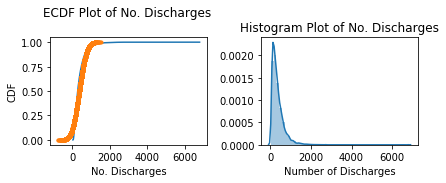

In [15]:
# Plot actual and theoretical ECDF for no. discharges

plt.subplot(221)

plt.plot(x1, y1) #theoretical normal distribution

plt.plot(x_theor1, y_theor1, marker='.', linestyle='none') #actual distribution

plt.title('ECDF Plot of No. Discharges \n ')

plt.xlabel('No. Discharges')

plt.ylabel('CDF')


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

#Plot Histogram of Number of Discharges

plt.subplot(222)

sns.distplot(df_filtered['Number of Discharges'])

plt.title('Histogram Plot of No. Discharges')


There seems to be some skwedness in the number of discharges distribution. The distribution looks normal except for the the tail.

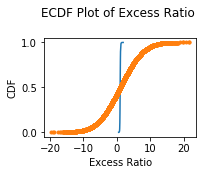

Text(0.5,1,'Histogram Plot of Excess Readmission Ratio')

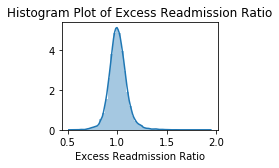

In [16]:
# Plot actual and theoretical ECDF for excess ratio

plt.subplot(221)

plt.plot(x2, y2) #theoretical normal distribution

plt.plot(x_theor2, y_theor2, marker='.', linestyle='none') #actual distribution

plt.title('ECDF Plot of Excess Ratio \n ')

plt.xlabel('Excess Ratio')

plt.ylabel('CDF')

plt.show()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

#Plot Histogram of Excess Readmission Ratio

plt.subplot(222)

sns.distplot(df_filtered['Excess Readmission Ratio'])

plt.title('Histogram Plot of Excess Readmission Ratio')


The distribution somewhat normal from with a slight tail and a narrow peak in the middle.

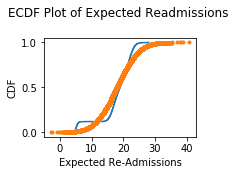

Text(0.5,1,'Histogram Plot of Expected Readmissions Rate')

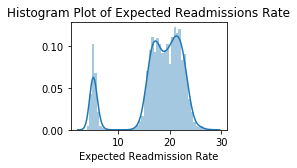

In [17]:
# Plot actual and theoretical ECDF for readmin expected

plt.subplot(221)

plt.plot(x3, y3) #theoretical normal distribution

plt.plot(x_theor3, y_theor3, marker='.', linestyle='none') #actual distribution

plt.title('ECDF Plot of Expected Readmissions \n ')

plt.xlabel('Expected Re-Admissions')

plt.ylabel('CDF')

plt.show()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

#Plot Histogram of Expected Readmission Rate

plt.subplot(222)

sns.distplot(df_filtered['Expected Readmission Rate'])

plt.title('Histogram Plot of Expected Readmissions Rate')


This distribution has three peaks with a significant interruption in the middle. It does not look normally distributed.

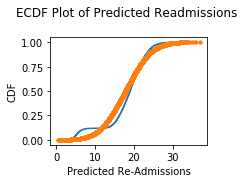

Text(0.5,1,'Histogram Plot of Predicted Readmission Rate')

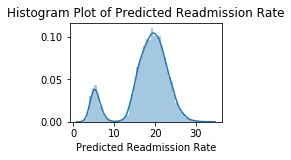

In [18]:
# Plot actual and theoretical ECDF for predicted readmin

plt.subplot(221)

plt.plot(x4, y4) #theoretical normal distribution

plt.plot(x_theor4, y_theor4, marker='.', linestyle='none') #actual distribution

plt.title('ECDF Plot of Predicted Readmissions \n ')

plt.xlabel('Predicted Re-Admissions')

plt.ylabel('CDF')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

#Plot Histogram of Predicted Readmission Rate

plt.subplot(222)

sns.distplot(df_filtered['Predicted Readmission Rate'])

plt.title('Histogram Plot of Predicted Readmission Rate')

Similar to expected readmissions rate. However, this distribution two three peaks with a significant interruption in the middle. It does not look like to normal distributions.

### Scatterplot of Excess Readmission Ratio and No. Discharges

The advantages of the scatterplot presented in the report above is that there is a lot of information displayed in a single image. We can clearly see that there is portion of hospital facilities with both high levels of discharges and high levels of excess readmission ratio. While in the other extreme, we can usee there is facilities that have low levels of discharges and high levels of excess readmissions. 

The disadvantage is that we are more prone to notice the extreme in this graph and not have a sense of the vast majority in the middle. 

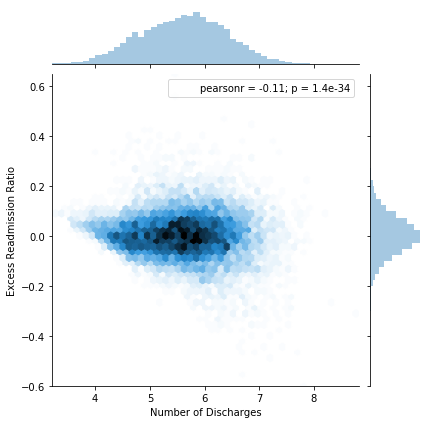

In [19]:
sns.jointplot(np.log(df_filtered['Number of Discharges']),
              np.log(df_filtered['Excess Readmission Ratio']), kind="hex")

The pearson correlation coefocient suggests that there is **NOT** a strong relationship between excess readmission ratio and number of discharges. The direction of the relationship is negative. Most values are concentrated between log of 5 and 7 of discharges. Moreover, there are values outside of that but much less. Which can raise the questions whether these values are outliers. There are outliers in both tail ends of the distribution.

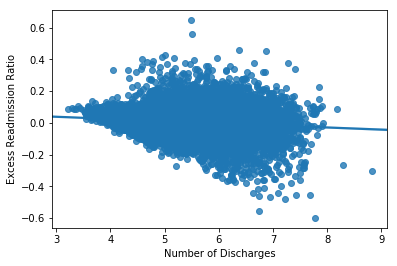

In [20]:
sns.regplot(np.log(df_filtered['Number of Discharges']),
            np.log(df_filtered['Excess Readmission Ratio']))

The is a small decrease in the excess re-admission ratio as number of discharges increase. However, the rate of decrease seems that is small when looking at the slope of the regression line.

### Plot Excess Readmission Ratio by State

I want to explore whether the mean and median excess ratio varies by state. There may be state characteristics that acocunt of differences other than facility capacity.

In [21]:
#Extract state and excess ratio columns

df_state = df_filtered[['State','Excess Readmission Ratio']]

# Group by mean

excess_state_mean = df_state.groupby('State').mean().reset_index().sort_values(by='Excess Readmission Ratio')

#Group by median

excess_state_median = df_state.groupby('State').median().reset_index().sort_values(by='Excess Readmission Ratio')

Plot Mean State Excess Ratio by State

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

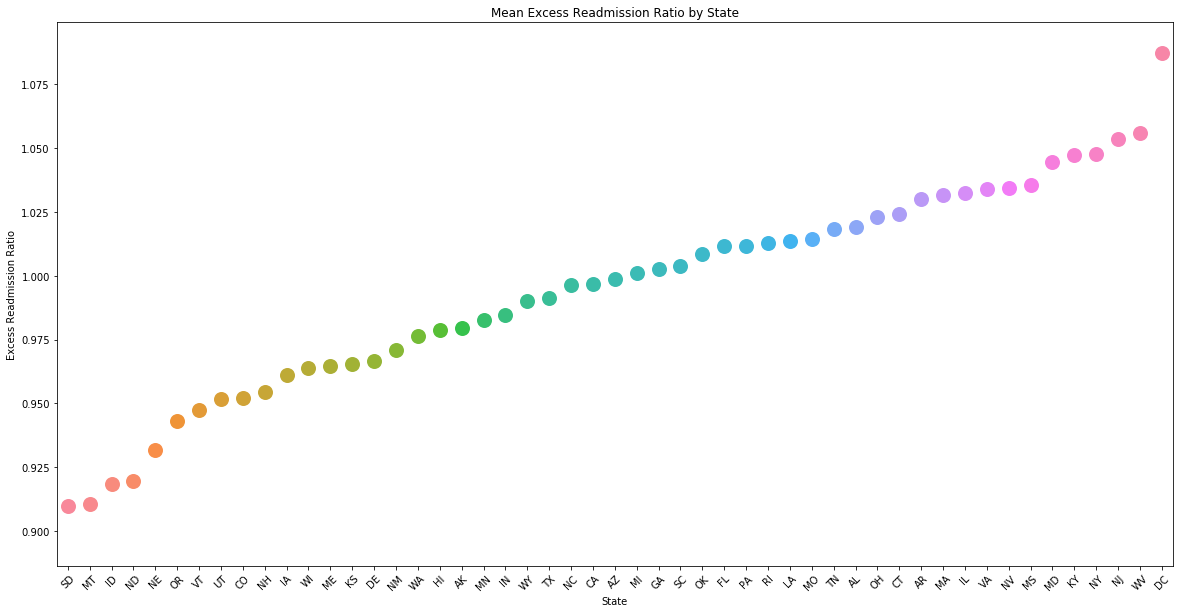

In [22]:
plt.rcParams['figure.figsize']=20,10

sns.stripplot(x='State', y='Excess Readmission Ratio', data=excess_state_mean, size=15)

plt.title('Mean Excess Readmission Ratio by State')

plt.xticks(rotation = 45)

Plot Median State Excess Ratio by State

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

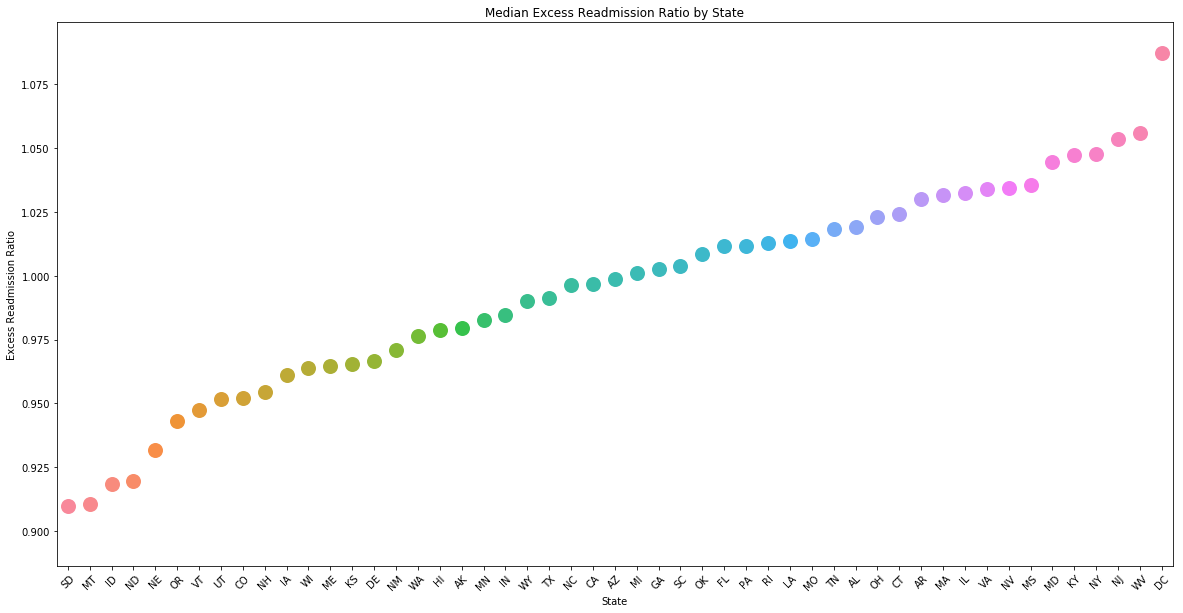

In [23]:
plt.rcParams['figure.figsize']=20,10

sns.stripplot(x='State', y='Excess Readmission Ratio', data=excess_state_mean, size=15)

plt.title('Median Excess Readmission Ratio by State')

plt.xticks(rotation = 45)

There differences in the excess mean and median re-admission ratio across states. The CMS may want to further investigate state level factors that may have an effect of excess readmission rates. 

### Bootstrap confidence intervals of excess ratio mean

In [24]:
#Define bootstrap function

def bs_sample(v, function, size = 10000):    
    
    ''' Take a 1d array, generate bootstrap samples of the same size as the data, and 
    calculate replicates of each bootstrap sample. Return an array of replicates of the same size as 
    bootstrap samples.'''
    
    #Generate random seed for replicability
    np.random.seed(42) 
    
    #Initialize replicates
    bs_sample = np.empty(size)
    
    #Create replicates
    for i in range(size):
        bs = function(np.random.choice(v, size=len(v)))
        bs_sample[i] = bs

    return  bs_sample

In [25]:
n_tries = 10000

excess_ratio_replicates = bs_sample(df_filtered['Excess Readmission Ratio'],np.mean,n_tries)

excess_ratio_less100_replicates = bs_sample(less_100['Excess Readmission Ratio'],np.mean,n_tries)

excess_ratio_more1000_replicates = bs_sample(more_1000['Excess Readmission Ratio'],np.mean,n_tries)

In [26]:
#Bootstrap 95% confidence interval

ci_excess_ratio = np.percentile(excess_ratio_replicates,[2.5,97.5])

ci_excess_ratio_less100 = np.percentile(excess_ratio_less100_replicates,[2.5,97.5])

ci_excess_ratio_more1000 = np.percentile(excess_ratio_more1000_replicates,[2.5,97.5])

print('Excess Ratio 95% CI: ', ci_excess_ratio)

print('Excess Ratio 95% CI (less than 100 discharges): ',ci_excess_ratio_less100)

print('Excess Ratio 95% CI (more than 1000 discharges): ',ci_excess_ratio_more1000)

print('Mean Difference: ', np.mean(less_100['Excess Readmission Ratio'])  - np.mean(more_1000['Excess Readmission Ratio']))

Excess Ratio 95% CI:  [1.00582353 1.00920142]
Excess Ratio 95% CI (less than 100 discharges):  [1.01937645 1.02593268]
Excess Ratio 95% CI (more than 1000 discharges):  [0.96719519 0.98913315]
Mean Difference:  0.04428292900204145


+ The bootstrap 95% confidence interval for the excess ratio is 1.005 - 1.009. This range is narrow. It contains the sample mean of 1.007.
+ The bootstrap 95% confidence interval for the excess ratio of facilities with less than 100 is 1.019 - 1.0259. It contains the sample mean of 1.0226.
+ The bootstrap 95% confidence interval for the excess ratio of facilities with more than a 1000 discharges is 0.967 - 0.989. It contains the sample mean of 0.978.
+ The confidence interval of the faculities with less than a 100 discharges and more than a 1000 discharges do not overlap. However, they also are not very fall apart numerically. The means difference is 0.044.


### Two Sample Hypothesis Testing (alpha = 0.05 & 0.01)

> H0: The excess readmission means are the same.

> Ha: The excess readmission means are different.

### Two sample permutation hypothesis test

> Prepare functions to carry permutation

In [27]:
# Define permutation function

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [28]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [29]:
#Define funtion to calculate difference of means

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

Draw and Compute p-Value of permutation replicates

In [30]:
# Compute difference of mean difference empirical_diff_means

empirical_diff_means = diff_of_means(less_100['Excess Readmission Ratio'], 
                                     more_1000['Excess Readmission Ratio'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(less_100['Excess Readmission Ratio'], 
                                 more_1000['Excess Readmission Ratio'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p_value_perm = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('P-value =', p_value_perm)

P-value = 0.0


The permutation sample suggests that there is an statistical significance between facilities at both the 0.05 and 0.01 alpha levels.

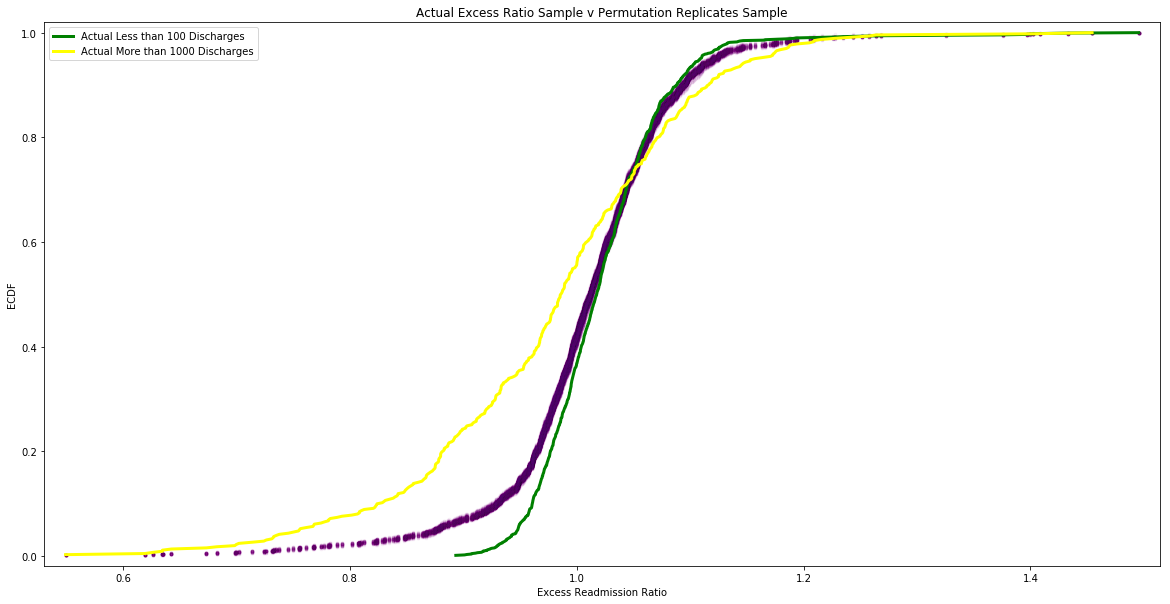

In [31]:
for _ in range(50):
    
    perm_sample_1, perm_sample_2 = permutation_sample(less_100['Excess Readmission Ratio'], 
                                                      more_1000['Excess Readmission Ratio'])
                                                      
    # Compute ECDFs
    x_6, y_6 = ecdf(perm_sample_1)
    x_7, y_7 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_6, y_6, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_6, y_6, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data

x_7, y_7 = ecdf(less_100['Excess Readmission Ratio'])
x_8, y_8 = ecdf(more_1000['Excess Readmission Ratio'])
_ = plt.plot(x_7, y_7, color='green', linestyle = '-', linewidth=3, label = 'Actual Less than 100 Discharges')
_ = plt.plot(x_8, y_8, color='yellow', linestyle = '-', linewidth=3, label = 'Actual More than 1000 Discharges' )

# Label axes, set margin, and show plot
plt.title('Actual Excess Ratio Sample v Permutation Replicates Sample')
plt.legend()
plt.margins(0.02)
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('ECDF')
plt.show()

There some difference between actual and permutated mean replicates samples. The replicate samples overlap.

**Perform a two sample t-test of the less than 100 and more than 1000 discharges samples. The Welch’s t-test is used because of unequal sample size and variance. This test is also robust to skewed samples.**

*The excess ratio overall distribution is somewhat normal from with a slight tail and a narrow peak in the middle.*

In [32]:
t_stat, p_value = stats.ttest_ind(less_100['Excess Readmission Ratio'],
                                  more_1000['Excess Readmission Ratio'],equal_var=False)

print('T-Stat:',t_stat)
print('P-value:',p_value)

T-Stat: 7.601742418500486
P-value: 1.2752435451140344e-13


According to the two sample t-test, at both the aplha level of 0.05 and 0.01, the null hypothesis can be rejected that the excess readmission means are the same. There is an statistically significant difference between the facilities with less than a 100 discharges and those with more than a 100 discharges. 

Both hypothesis tests tells us that there is an statistically significant differences between the excess ratios of the with less than a 100 discharges and those with more than a 100 discharges.

These tests does not tell us why or that is due to facility capacity. Moreover, while there seems to be a diffrence there is enough evidence to suggest that there may be other factors attributes having an effect, as well state by state variations/effects. 

Futher, as shown previously the mean difference between the two samples is very small which may not have much impact on quality of care, and not worth the cost of adressing it. Moreover, other factors may account for this small difference as well.

## Conclusions

**A. Do you agree with the above analysis and recommendations? Why or why not?**

For the most part, I do not agree with the recommendations outlined in the CMS report. My reasoning is outlined below. 

**1-No correlation coeficients are provided.** 

+ The report mentions *"significant correlation between hospital capacity (number of discharges) and readmission rates"* however an specific value is not provided. Even if the association is high, correlation only tells us that there is a numerical association between the variables and NOT than one causes the other. 

+ I find that the there is a weak association between number of discharges and excess readmission rates.
+ There seems to be a decrease as However, the regression line slope is small, as a result rate of change is small as well. 

**2- Statistical Significance v Practical Siginificance.**

+ There is a mean difference of 0.044 between facilities with < 100 discharges and facilities > 1000 dicharges. 
+ The scatterplots plotted suggests that there are groups of facilities that have excess readmission ratios in both sides of the distribution. Looking at these more closely may be fruitful.
+ The t-test and permutation test both showed that there is a statistically significant difference between the excess ratios between facilities with less than a 100 discharges and those with more than a 100 discharges.
   + *These tests does not tell us why or that is due to facility capacity. Moreover, while there seems to be a diffrence there is enough evidence to suggest that there may be other factors attributes having an effect, as well state by state variations/effects.** 
+ While there seems to be a difference, it is quite small. Combined with the small rate of decrease between  It makes you question whether a broad policy like this us needed to address the small difference and if other factors will adress this small difference. What is the cost-benefit of adressing this small difference?

**3-It does not take into account other factors.** 

+ I would recommend to the client, futher investgating the factors that drive excess hospital re-admission ratios and discharges. 
+ There maybe policies, medical talent, management, state level effects that have an substantial effect on excess readmission other than facility capacity. These things may also interact with facility size due to economies of scale. 
+ When plotting state by state median and means there are differences across.

**4-I have no information on how predicted re-admissions are calculated.** 

+ There maybe something in the formula or data that is based on that causes bias. Also always ensuring data collection quality and accuracy 

**5-Focus is in facilities with less than 100 discharges and above a greater 1000 discharges.** 

+ I think this focus is a bit misleading becuase these two ranges are the extremes of the  facilities distribution. The middle of the ranges is not discussed at all. Basing a broad policy on the extremes of the distribution is not sound. Also they want to require extra requirements from facilities with less than 300 of capacity, however the facilities from 101 to 300 of capacity are not discussed anywhere.

## End of Notebook